**Churn** is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

### This notebook for **all learners** of **`Rocky SME@SIMPLILEARN`**. 


> Connect here https://linkedin.com/in/rocky-jagtiani-3b390649/  

> We would do lots of EDA , some Statistical analysis to understand our data well

> We would classify the customers into 2 categories -> Likely to Churn and less Likely.

> Test logistic regression for different hyperparameters. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

print('Libraries Import Successful')

Libraries Import Successful


Performing EDA over the Telecom Churn Dataset
--

While doing EDA , where ever necessary would do **`data cleaning`** and **`pre-processsing`** as well.

In [2]:
## loading the Telecom Churn dataset
Tdata = pd.read_csv('Telcom_Customer_Churn.csv')
## https://drive.google.com/open?id=1vmVKLJc3iLw-svANZd3v6iTNxdjOXfM_
## Source of Data : https://www.kaggle.com/blastchar/telco-customer-churn

# Checking the shape of the Data
print("Rows     : ",Tdata.shape[0])
print("Columns  : ",Tdata.shape[1])

Rows     :  7043
Columns  :  21


In [3]:
Tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#  Lets write one function to find out 
## missing values ,unique values ,data types  --> EDA
def df_summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    
    ## converting all data to dataframe
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    
    ## renaming columns to default 0 to some sensible name
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    
    ## concatting the 3 dataframes. Remember pd.merge can merge only 2 df at a time
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    
    return output;  

In [5]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


In [6]:
## All variable are looking good but surprislingly amoung all the variable 
## TotalCharges having many classes

Tdata.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [7]:
## Seems the variables is wrongly classified as object data type .
## We will convert it into Numerical

Tdata.TotalCharges = pd.to_numeric(Tdata.TotalCharges, errors='coerce')
## Note : errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
## If ‘raise’, then invalid parsing will raise an exception.
## If ‘coerce’, then invalid parsing will be set as NaN.
## If ‘ignore’, then invalid parsing will return the input.
## More here : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

Tdata.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
## 'customerID' uniquely identifies each customer record
## but won't help in classification or prediction task
Tdata.drop('customerID',axis=1, inplace=True)
Tdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
## Lets seperate Object Columns and Numerical Columns 

Num_Cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()

Cat_Cols=Tdata.select_dtypes(include=['object']).columns.tolist()

## Why we should do this ?
## Numrical and categorical colns need different kinds of processing 
## like Numrical colmns need scaling
## and Categorical colns need feature engineeering like one-hot encoding 

In [10]:
Tdata[Num_Cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
## Do u see some missing values in the TotalCharges column ?
## Yes. So lets fill any and all missing numerical values with the respective column mean




,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


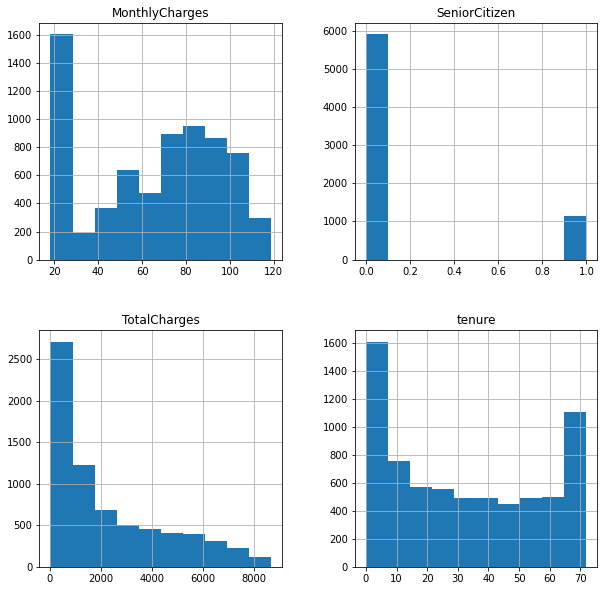

In [12]:
## visualising the data.  Do u find any highly skewed data column ?
Tdata[Num_Cols].hist(figsize=(10,10));

## This is an Optional step. 

`Data is right skewed in TotalCharges variable`.  Nothing to worry , it won't influence our prediction as their are many other columns as well.

In [13]:
# Creating function to see all the object data type variables 
## using single function
def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")
        
## this helps to EDA on categorical columns        

In [14]:
cat_col_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Male', 'Female'}
Variable : Partner
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : Dependents
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : PhoneService
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : MultipleLines
Count of unique values : 3
Unique values :  {'No phone service', 'Yes', 'No'}
Variable : InternetService
Count of unique values : 3
Unique values :  {'Fiber optic', 'DSL', 'No'}
Variable : OnlineSecurity
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : OnlineBackup
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : DeviceProtection
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : TechSupport
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : StreamingTV
Count of unique values : 3
Un

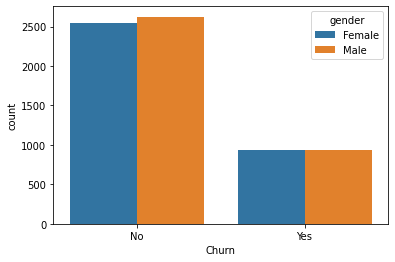

In [15]:
## To explore data, be inquistive !!
## Ask your self some very basic questions
## Is churning more common among male or females ?



In [16]:
## Which categorical columns are binary ?
Binary_class = Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() == 2].keys().tolist()
print(Binary_class)

print("----------------------------------")
print("----------------------------------")

## Which categorical columns are n-ary or multi-class ?
Multi_class =  Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() > 2].keys().tolist()
print(Multi_class)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
----------------------------------
----------------------------------
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


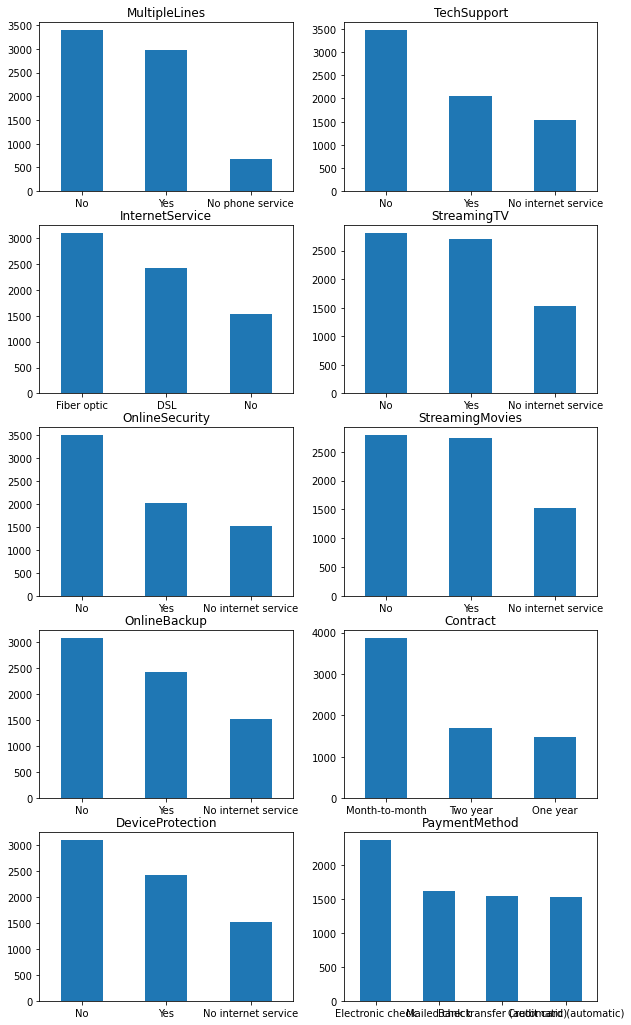

In [17]:
# Multi class variable distribution
## plots vertically, i.e columns wise
fig, axes = plt.subplots(nrows = 5 , ncols = 2, figsize = (10,18))

for i, item in enumerate(Multi_class):
    if i < 5:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=5 and i < 10:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-5,1],rot = 0)
        
    
    ax.set_title(item)

In [18]:
## Feature Engineering 
## the categorical columns

## Label encoding Binary Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in Binary_class:
    Tdata[i] = le.fit_transform(Tdata[i])

In [19]:
Tdata[Binary_class].shape

(7043, 6)

In [20]:
Tdata[Binary_class].head()  ## All Yes -> 1 , all No -> 0

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [21]:
## Feature Engineering 
## the multi_class categorical columns 
## One hot encoding

Tdata_Dummy = pd.get_dummies(Tdata[Multi_class])

Tdata_Dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [22]:
## concating 3 parts of dataframes -> Numerical, Label_Encoded_Binary_Features, 
## One_hot_encoded_Mult_Class_Features

final_df = pd.concat([Tdata[Num_Cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 41)

0    5174
1    1869
Name: Churn, dtype: int64


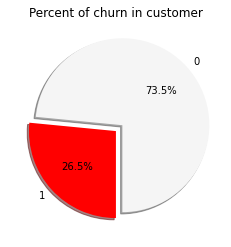

In [23]:
## Lets visualise the target column -> churn
## What percent of customers would like to leave your network ? 

labels = final_df['Churn'].value_counts(sort = True).index
#print(labels)
sizes = final_df['Churn'].value_counts(sort = True)
print(sizes)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # only explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)
# remember pie-chart is drawn in clockwise direction

plt.title('Percent of churn in customer')
plt.show()

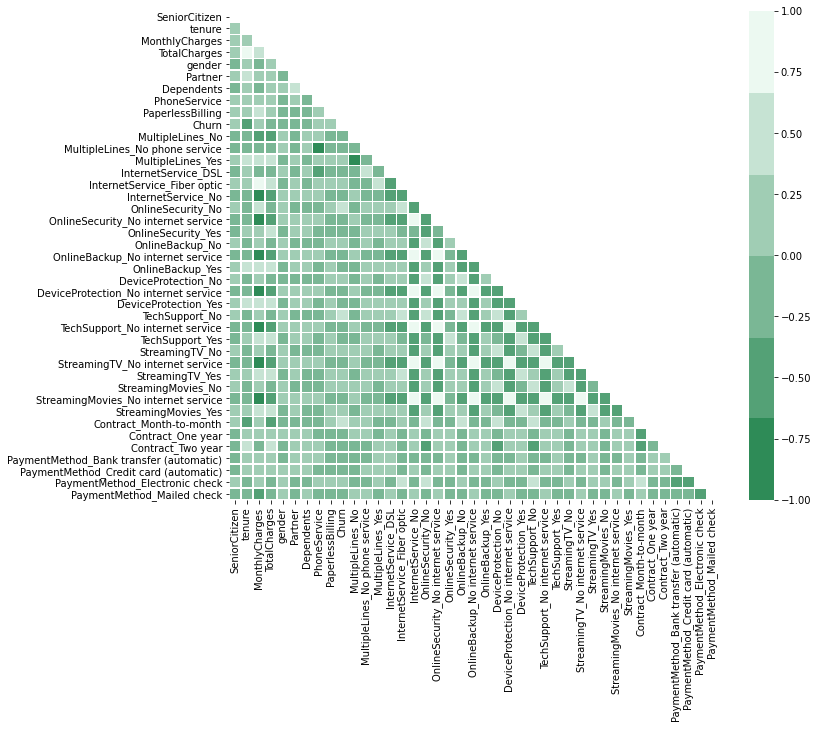

In [24]:
# Correlation
corr = final_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)  
## about np.zeros_like https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html

mask[np.triu_indices_from(mask)] = True
## https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,  center=0, square=True, linewidths=.5, mask=mask);

From the above heatmap we can see the highly correlated variables in dark or very light green.

`For example`

`Total charge` is highly +vely correlated with `Tenure`.

**Learner is expected to self analyse and list few +vely and -vely coorelated variable pairs**

**Why displaying upper triangular or lower triangular part of the correlation matrix ?**

<hr />

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements.

<font color='red'><b>More on this later as an Assignment</b></font> 

<hr />

In [25]:
## DOES the above corr matrix confuse ????

## Redoing the above correlation matrix over the orginal dataframe attributes
## Easier and standard way of plotting the correlation matrix
Tdata.corr().style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000


By now we have done :
--

1. EDA

2. Data pre-processing 

3. Found that some attributes / features are correlated

<hr />

> let's move ahead to 

1. Split data into train-test

2. Select the most important features i.e drop the less important ones.
( its important to keep the model simple)

3. apply Logistic Regression for classification

4. Tune the above model.

5. Compare the above model with 2 other classifiers.

In [26]:
## Dividing data into Train - test set
from sklearn.model_selection import train_test_split
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [27]:
print('The number of samples into the train data is {}.'.format(X_train.shape[0]))

print('The number of samples into the test data is {}.'.format(X_test.shape[0]))

The number of samples into the train data is 5634.
The number of samples into the test data is 1409.


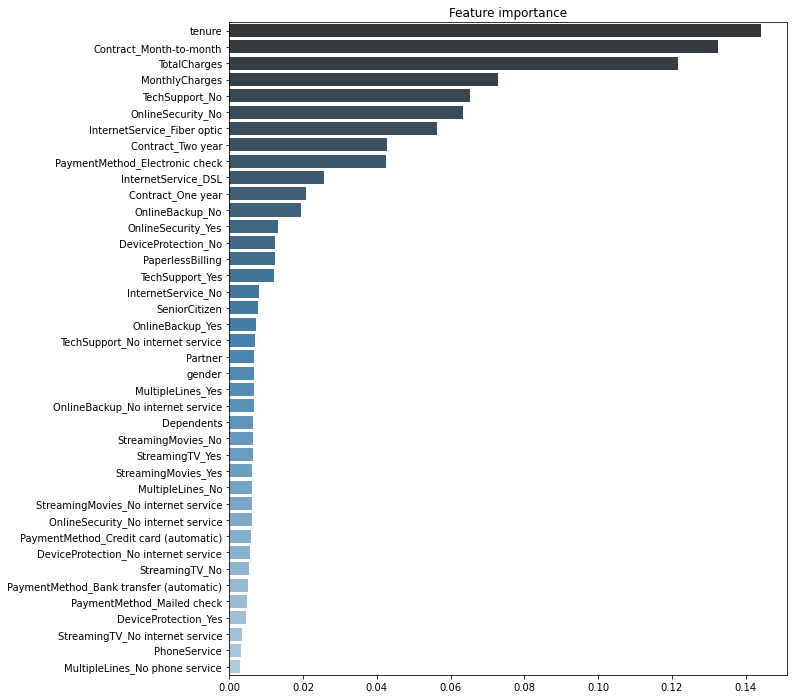

In [28]:
# Feature selection using Random Forest

from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}

clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## About features importances
## https://machinelearningmastery.com/calculate-feature-importance-with-python/

Since `tenure` has the highest importance , lets look more closely

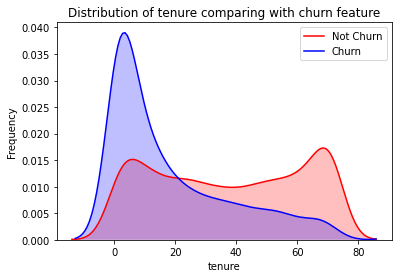

In [29]:
# tenure distibution 
g = sns.kdeplot(final_df.tenure[(final_df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(final_df.tenure[(final_df["Churn"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("tenure")
g.set_ylabel("Frequency")

plt.title('Distribution of tenure comparing with churn feature')

g = g.legend(["Not Churn","Churn"])

There is a chance that customer will churn based on `tenure` . Lesser the range more chance of `churn`.

### Model - Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

## YOUR CODE HERE



LogisticRegression()

In [31]:
accuracy = logistic_model.score(X_test, y_test)

print("Logistic Regression accuracy is :",accuracy*100)

## Be careful :  Don't depend on accuracy for an unbalanced data
## Instead keep track of f1-score

from sklearn.metrics import f1_score
f1 = f1_score(logistic_model.predict(X_test), y_test)

print("f1 score = ", f1)

Logistic Regression accuracy is : 80.90844570617459
f1 score =  0.602658788774003


[[936 125]
 [144 204]]


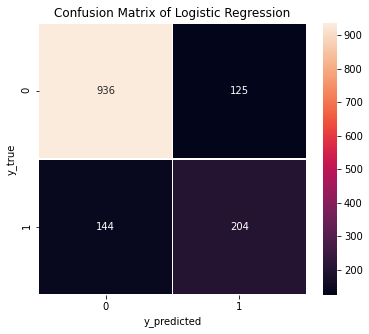

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred)

print(cm_lr)

##-------------------------
## visualization is optional
# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

Using Grid search CV and L2 Penality for logistic regression

In [33]:
from sklearn.model_selection import GridSearchCV
model_parameters = {
        'C': [1,10,100,1000],
        'class_weight': ['balanced', None]
    }

## Importance of C 
## C=1/λ. // 100 = 1/0.01
## Inverse of regularization strength; must be a positive float.
## https://stackoverflow.com/questions/22851316/

## Importance of class_weight
## 'class_weight': 'balanced' weighs classes proportionally to the inverse of their frequency.
## The "balanced" mode uses the values of y to automatically adjust weights 
## inversely proportional to class frequencies in the input data: 
## n_samples / (n_classes * n_samples_within_class)


## Must read this in class
## https://machinelearningmastery.com/cost-sensitive-logistic-regression/

## Also read docs of class_weight
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [34]:
model = LogisticRegression(penalty='l2')  ## Ridge

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    scoring='f1')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None]},
             scoring='f1', verbose=1)

In [35]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 10, 'class_weight': 'balanced'}


In [36]:
# Re-fit the model with the best parameters
final_mod = LogisticRegression(**gscv.best_params_)
final_mod.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [37]:
accuracy = final_mod.score(X_test, y_test)

print("Logistic Regression accuracy is :",accuracy*100)

## Be careful :  Don't depend on accuracy for an unbalanced data
## Instead keep track of f1-score

from sklearn.metrics import f1_score
f1 = f1_score(final_mod.predict(X_test), y_test)

print("f1 score = ", f1)

Logistic Regression accuracy is : 76.15330021291696
f1 score =  0.6307692307692307


In [38]:
# View the model coefficients
list(zip(X_train.columns, final_mod.coef_[0]))

[('SeniorCitizen', 0.1879574882728865),
 ('tenure', -0.05946224918479221),
 ('MonthlyCharges', 0.0077076250552214915),
 ('TotalCharges', 0.00030711082867731154),
 ('gender', -0.016438392093949615),
 ('Partner', -0.0062129679953710736),
 ('Dependents', -0.13379458335868546),
 ('PhoneService', -0.14530749354951297),
 ('PaperlessBilling', 0.2608087054063071),
 ('MultipleLines_No', -0.19726587800297526),
 ('MultipleLines_No phone service', 0.10162908860604684),
 ('MultipleLines_Yes', 0.051958384466601865),
 ('InternetService_DSL', -0.220238891264975),
 ('InternetService_Fiber optic', 0.22444438611615022),
 ('InternetService_No', -0.047883899762870795),
 ('OnlineSecurity_No', 0.2752650409895193),
 ('OnlineSecurity_No internet service', -0.04788389976287074),
 ('OnlineSecurity_Yes', -0.27105954615612166),
 ('OnlineBackup_No', 0.10846287706202143),
 ('OnlineBackup_No internet service', -0.047883899762870795),
 ('OnlineBackup_Yes', -0.10425738223594423),
 ('DeviceProtection_No', 0.110906185008

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,final_mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1061
           1       0.51      0.82      0.63       348

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.78      1409



## Changing the threshold for the Model

#### By default, Logistic regression predicts the probability at 0.5 Threshold, We will be creating a function to check the metrics at each threshold Level. 

In [40]:
from sklearn.metrics import accuracy_score
pred_proba_df = pd.DataFrame(final_mod.predict_proba(X_test)[:,1])

threshold_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9]

for i in threshold_list:
    print ('For Threshold = {} '.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)    
    test_accuracy = accuracy_score(y_test,Y_test_pred)
    print('Accuracy {}'.format(test_accuracy))
    print()

For Threshold = 0 
Accuracy 0.24698367636621718

For Threshold = 0.05 
Accuracy 0.37189496096522356

For Threshold = 0.1 
Accuracy 0.44499645138396027

For Threshold = 0.15 
Accuracy 0.5017743080198722

For Threshold = 0.2 
Accuracy 0.5755855216465579

For Threshold = 0.25 
Accuracy 0.6174591909155429

For Threshold = 0.3 
Accuracy 0.6543647977288858

For Threshold = 0.35 
Accuracy 0.6848828956706884

For Threshold = 0.4 
Accuracy 0.7154009936124911

For Threshold = 0.45 
Accuracy 0.7359829666430092

For Threshold = 0.5 
Accuracy 0.7615330021291696

For Threshold = 0.55 
Accuracy 0.7693399574166075

For Threshold = 0.6 
Accuracy 0.7764371894960965

For Threshold = 0.65 
Accuracy 0.7913413768630234

For Threshold = 0.7 
Accuracy 0.8055358410220014

For Threshold = 0.75 
Accuracy 0.8161816891412349

For Threshold = 0.8 
Accuracy 0.8126330731014905

For Threshold = 0.9 
Accuracy 0.7721788502484032



In [ ]:
## 20 mins in class - Assignment
## fit the lr model on top 5 important features
## logistic_model.fit(X_train_reduced,y_train)
## For Threshold = 0.75 
## This is DIY work.



